In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import wordcloud

In [ ]:
df=pd.read_csv('/content/supermarket_sales new.csv')

In [ ]:
df.head()

,Gender,Invoice ID,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%
0,Female,750-67-8428,A,Yangon,Member,Health and beauty,74.69,7,261.415
1,Female,226-31-3081,C,Naypyitaw,Normal,Electronic accessories,15.28,5,3.820
2,Female,355-53-5943,A,Yangon,Member,Electronic accessories,68.84,6,20.652
3,Female,315-22-5665,C,Naypyitaw,Normal,Home and lifestyle,73.56,10,36.780
4,Female,665-32-9167,A,Yangon,Member,Health and beauty,36.26,2,3.626


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         1000 non-null   object 
 1   Invoice ID     1000 non-null   object 
 2   Branch         1000 non-null   object 
 3   City           1000 non-null   object 
 4   Customer type  1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Tax 5%         1000 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB


In [ ]:
df.describe()

,Unit price,Quantity,Tax 5%
count,1000.000000,1000.000000,1000.000000
mean,55.672130,5.510000,43.911392
std,26.494628,2.923431,100.551612
min,10.080000,1.000000,1.066000
25%,32.875000,3.000000,6.222500
50%,55.230000,5.000000,12.404000
75%,77.935000,8.000000,27.226250
max,99.960000,10.000000,985.000000


In [ ]:
df.isnull().sum()

NameError: name 'df' is not defined

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.nunique()

,0
Gender,2
Invoice ID,1000
Branch,3
City,3
Customer type,2
Product line,6
Unit price,943
Quantity,10
Tax 5%,990


In [ ]:
df.columns

Index(['Gender', 'Invoice ID', 'Branch', 'City', 'Customer type',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%'],
      dtype='object')

In [ ]:
df = df.rename(columns={'Product line': 'product_line'})
unique_product_lines = df.product_line.unique()

print(unique_product_lines)

['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Food and beverages' 'Fashion accessories' 'Sports and travel']


In [ ]:
df.columns

Index(['Gender', 'Invoice ID', 'Branch', 'City', 'Customer type',
       'product_line', 'Unit price', 'Quantity', 'Tax 5%'],
      dtype='object')

In [ ]:
df.product_line.value_counts()

,count
product_line,
Fashion accessories,178
Food and beverages,174
Electronic accessories,170
Sports and travel,166
Home and lifestyle,160
Health and beauty,152


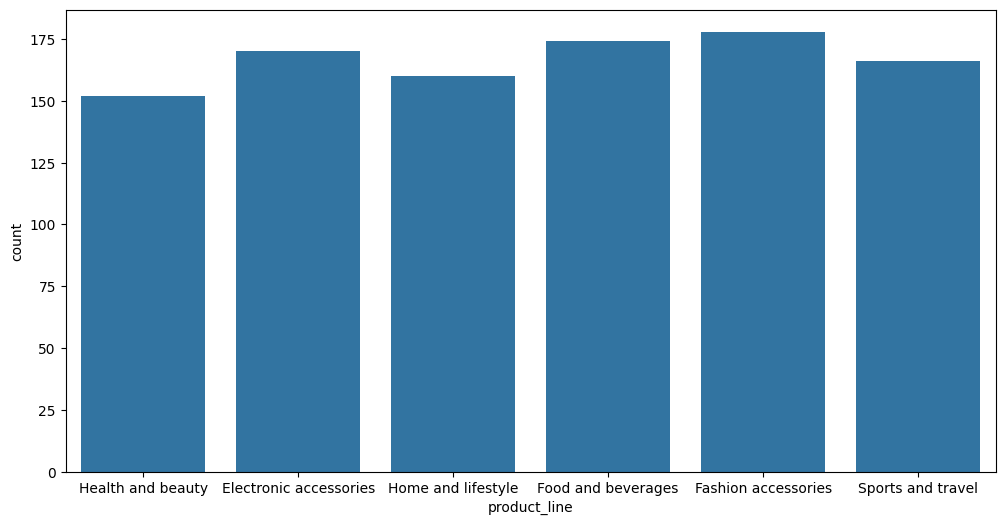

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='product_line', data=df)
plt.show()


In [ ]:
df.City.value_counts()

,count
City,
Yangon,340
Mandalay,332
Naypyitaw,328


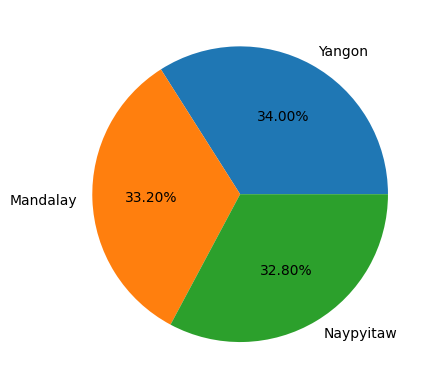

In [ ]:
plt.pie(x=df.City.value_counts(), labels=df.City.value_counts().index,autopct='%1.2f%%')
plt.show()

In [ ]:
pd.crosstab(df.City,df.Branch)

Branch,A,B,C
City,,,
Mandalay,0,332,0
Naypyitaw,0,0,328
Yangon,340,0,0


In [ ]:
df.Branch.value_counts()

,count
Branch,
A,340
B,332
C,328


In [ ]:
pd.crosstab(df.Branch,df.Gender)

Gender,Female,Male
Branch,,
A,161,179
B,162,170
C,178,150


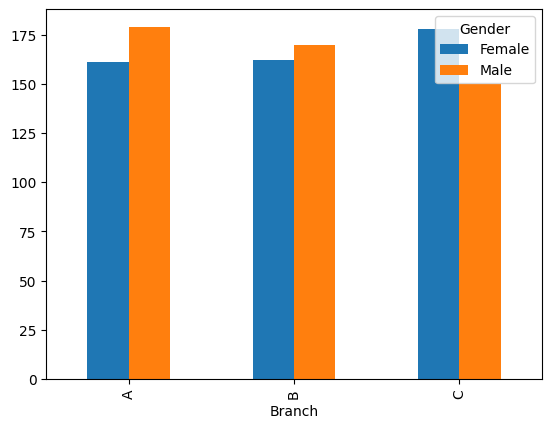

In [ ]:
pd.crosstab(df.Branch,df.Gender).plot(kind='bar')
plt.show()


In [ ]:
# Calculate total quantity for each product line
product_line_quantity = df.groupby('product_line')['Quantity'].sum()
product_line_quantity


,Quantity
product_line,
Electronic accessories,971
Fashion accessories,902
Food and beverages,952
Health and beauty,854
Home and lifestyle,911
Sports and travel,920


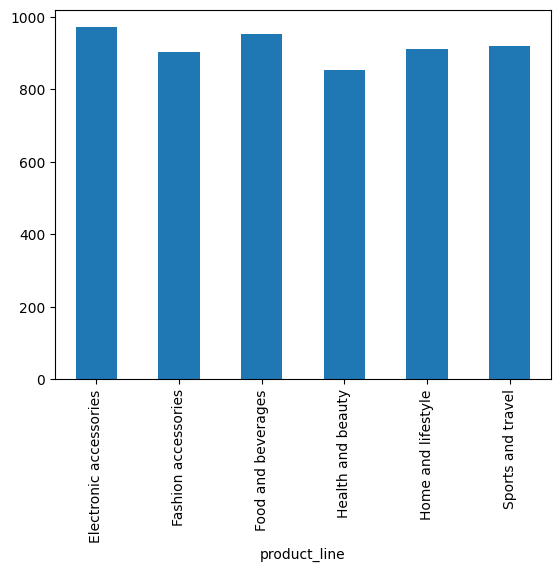

In [ ]:
product_line_quantity.plot(kind='bar')
plt.show()

In [ ]:
# Group by product line and calculate the sum of quantity and the mean of unit price
product_line_summary = df.groupby('product_line').agg({'Quantity': 'sum', 'Unit price': 'mean'})

# Display the result
product_line_summary


,Quantity,Unit price
product_line,,
Electronic accessories,971,53.551588
Fashion accessories,902,57.153652
Food and beverages,952,56.008851
Health and beauty,854,54.854474
Home and lifestyle,911,55.316937
Sports and travel,920,56.993253


In [ ]:
# Calculate total sales
df['Total_Sales'] = df['Unit price'] * df['Quantity']


In [ ]:
df.head()

,Gender,Invoice ID,Branch,City,Customer type,product_line,Unit price,Quantity,Tax 5%,Total_Sales
0,Female,750-67-8428,A,Yangon,Member,Health and beauty,74.69,7,261.415,522.83
1,Female,226-31-3081,C,Naypyitaw,Normal,Electronic accessories,15.28,5,3.820,76.40
2,Female,355-53-5943,A,Yangon,Member,Electronic accessories,68.84,6,20.652,413.04
3,Female,315-22-5665,C,Naypyitaw,Normal,Home and lifestyle,73.56,10,36.780,735.60
4,Female,665-32-9167,A,Yangon,Member,Health and beauty,36.26,2,3.626,72.52


In [ ]:
df.groupby('product_line')['Total_Sales'].sum()

,Total_Sales
product_line,
Electronic accessories,51750.03
Fashion accessories,51719.90
Food and beverages,53471.28
Health and beauty,46851.18
Home and lifestyle,51297.06
Sports and travel,52497.93


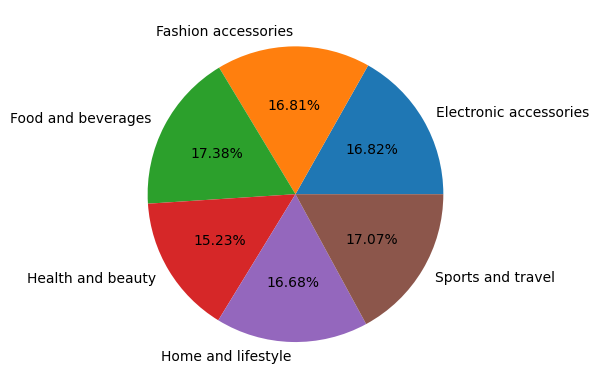

In [ ]:
plt.pie(x=df.groupby('product_line')['Total_Sales'].sum(), labels=df.groupby('product_line')['Total_Sales'].sum().index,autopct='%1.2f%%')
plt.show()

In [ ]:
df.groupby('Gender')['product_line'].value_counts()

Gender  product_line          
Female  Fashion accessories       96
        Food and beverages        90
        Sports and travel         88
        Electronic accessories    84
        Home and lifestyle        79
        Health and beauty         64
Male    Health and beauty         88
        Electronic accessories    86
        Food and beverages        84
        Fashion accessories       82
        Home and lifestyle        81
        Sports and travel         78
Name: count, dtype: int64

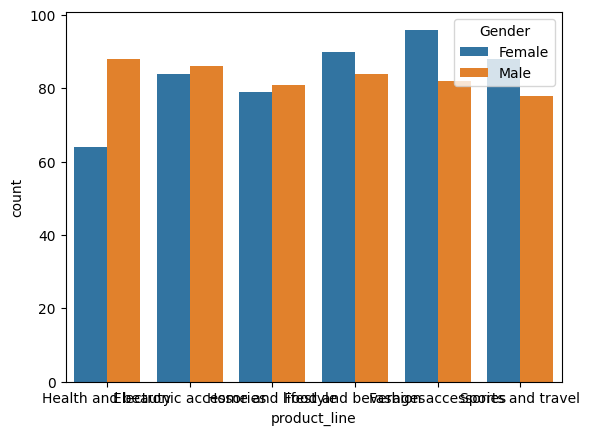

In [ ]:
sns.countplot(x='product_line', hue='Gender', data=df,  )
plt.show()

In [ ]:
df.groupby('Gender')['Total_Sales'].sum()

,Total_Sales
Gender,
Female,159888.50
Male,147698.88


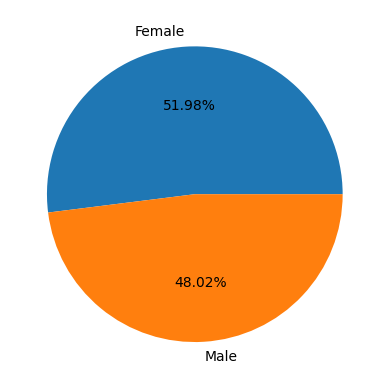

In [ ]:
plt.pie(x=df.groupby('Gender')['Total_Sales'].sum(), labels=df.groupby('Gender')['Total_Sales'].sum().index,autopct='%1.2f%%')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Select features (X) and target variable (y)
X = df[['Unit price', 'Quantity', 'Total_Sales']]  # Example features
y = df['product_line']  # Example target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize the decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree Classifier: {accuracy}")


Accuracy of the Decision Tree Classifier: 0.14


In [ ]:
from sklearn.linear_model import LinearRegression

# Example features and target variable (adjust as needed)
X = df[['Unit price', 'Quantity']]
y = df['Total_Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model (example using R-squared)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# You can further analyze the model's coefficients and intercept
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


R-squared: 0.8824798368217058
Coefficients: [ 5.57787384 55.6066772 ]
Intercept: -309.1953021964603
